In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

In [ ]:
def plot(rep_df,rep_label,s) :
  l=rep_label[0]
  data=rep_df.to_numpy()
  target=l.to_numpy()
  ar=np.linspace(0,target.shape[0]-1,target.shape[0])

  dist=np.zeros([target.shape[0],target.shape[0]],dtype=float)

  for i in range(target.shape[0]):
    for j in range(target.shape[0]):
      dist[i][j]=np.linalg.norm(data[i]-data[j])

  np.random.seed(0)
  sns.set_theme()
  plt.subplots(figsize=(s,s))
  #ax = sns.heatmap(dist,cmap="PiYG",vmin=0,vmax=30)
  ax = sns.heatmap(dist,cmap="rainbow",vmin=0,vmax=20)

  return dist

def get_avg(dist_mtx):
  (n,m) = dist_mtx.shape
  count = 0
  sum = 0

  for i in range(n):
    for j in range(i+1,m):
      sum += dist_mtx[i,j]
      count += 1

  return sum/count

Loading data from drive

In [ ]:
from collections import Counter, defaultdict
import time
import os
import sklearn
# Third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (auc, average_precision_score, 
                              roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.base import BaseEstimator

plt.rcParams.update({'font.size': 12})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


avg pairwise dist : 10.444475420776078


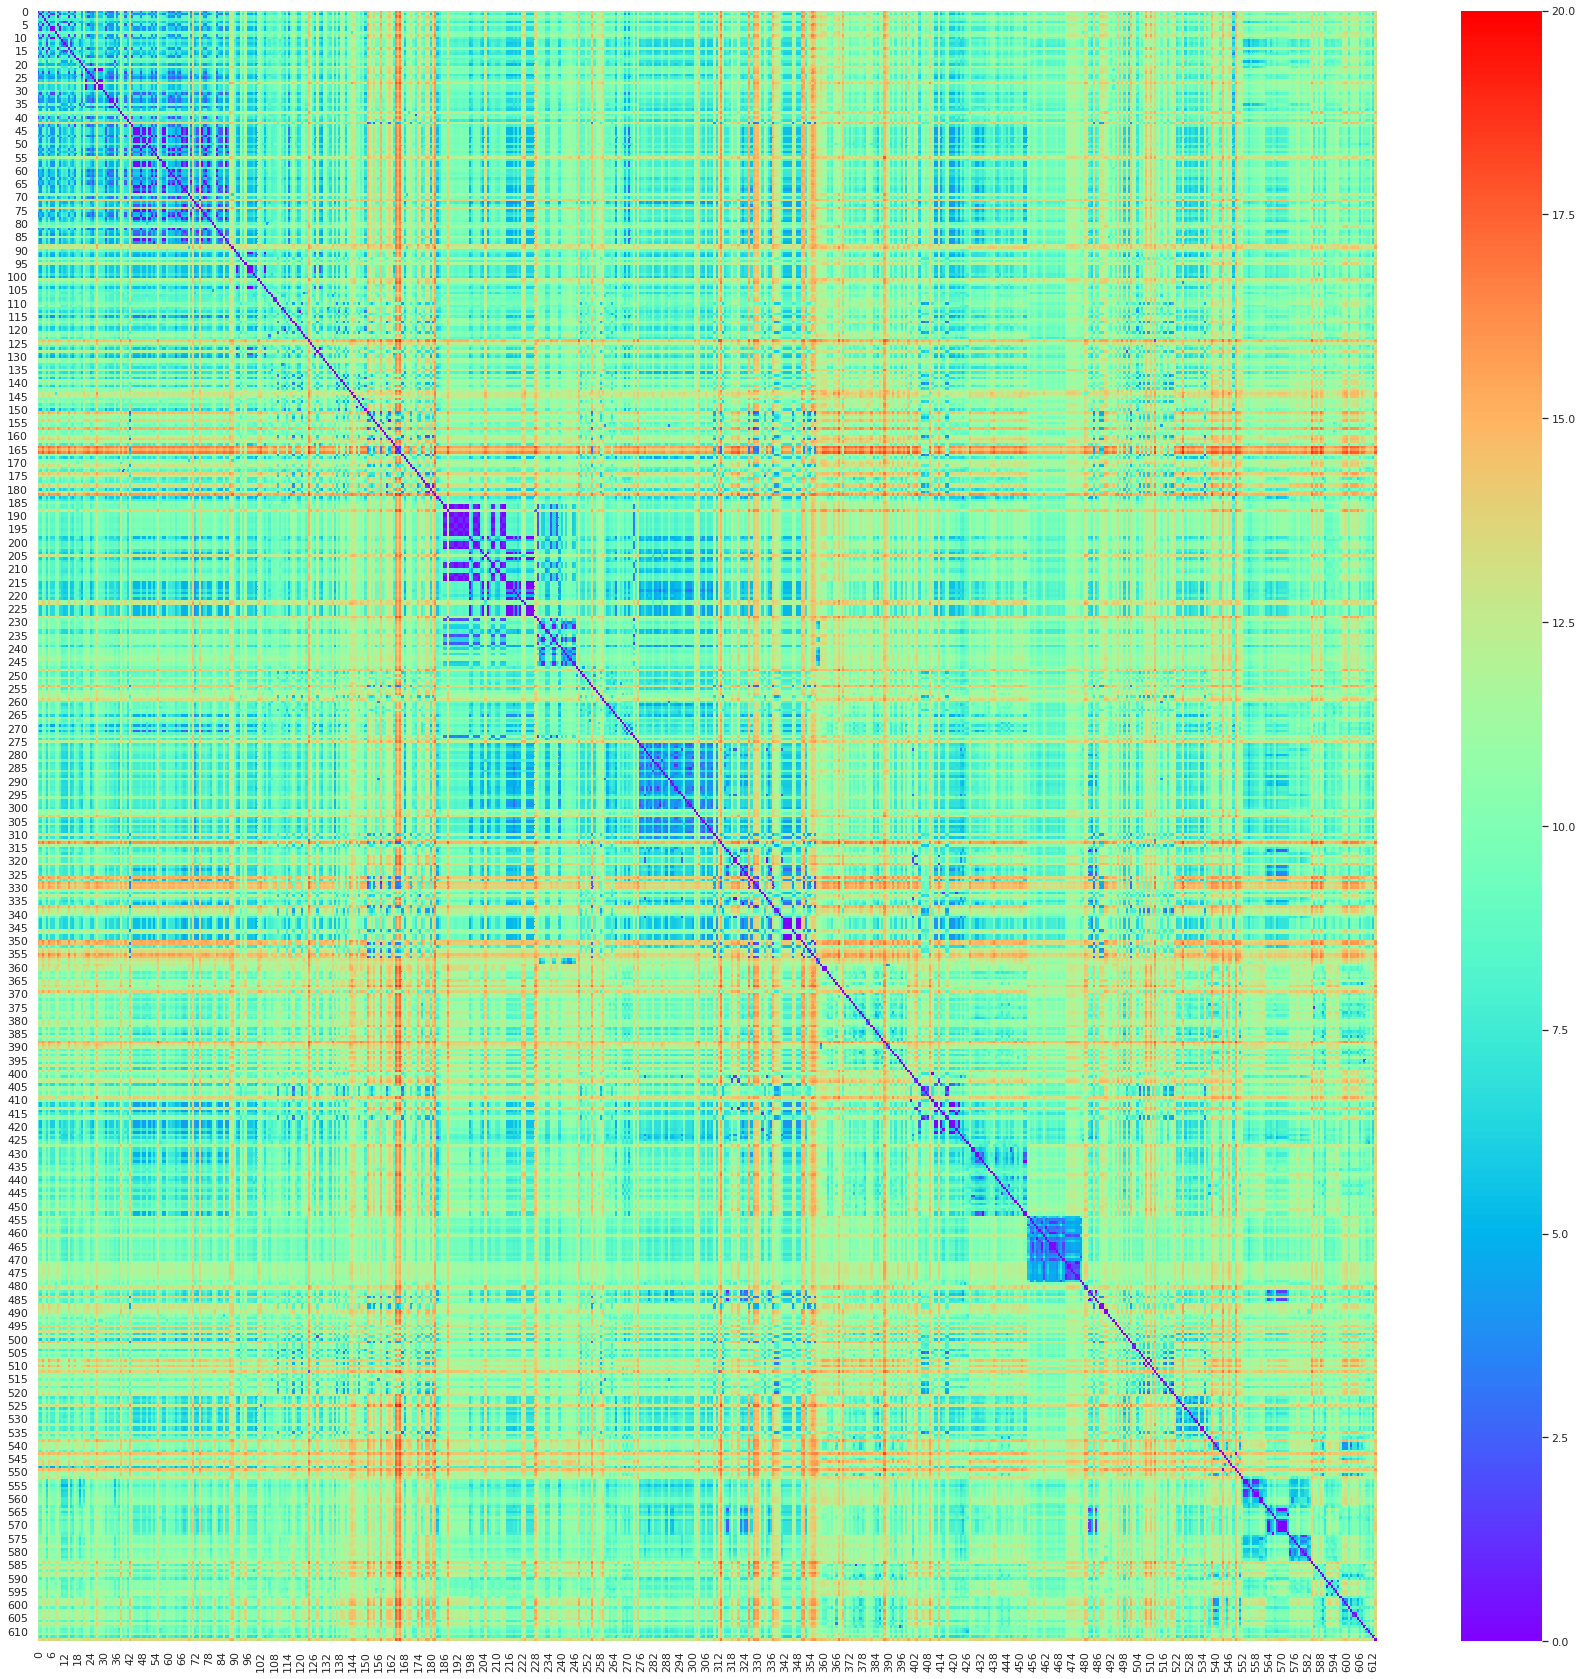

In [ ]:
rep_df=pd.read_csv("/content/drive/MyDrive/code2vec-api data/1to19_vec.csv", sep=" ",header=None)
rep_label=pd.read_csv("/content/drive/MyDrive/code2vec-api data/1to19_ast.txt", sep=" ",header=None)
pairwise_dist = plot(rep_df,rep_label,30)
print("avg pairwise dist :", get_avg(pairwise_dist) )

Acc to codekernel the first 186 should be one cluster

187-276 cl2

277-359 cl3

360-400 cl4

401-427 cl5

428-454 cl6

455-480 cl7

481-502 cl8

503-522 cl9

523-539 cl10

530-552 cl11

553-564 cl12

565-574 cl13

575-584 cl14

585-591 cl15

592-597 cl16

598-603 cl17

604-609 cl18

610-614 cl19

In [ ]:
rep_label

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,test|disallow|drop|of|column|on|parent|table,"void,1726006538,METHOD_NAME","void,521448339,connection","void,-1070420284,conn","void,-1890579727,drivermanager","void,2092583876,geturl","void,-1890579634,getconnection","void,1700062568,conn","void,1700062630,createstatement","void,873735792,ddl",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,test|leading|pk|with|trailing|rvc,"void,1726006538,METHOD_NAME","void,521448339,connection","void,-1070420284,conn","void,-1890579727,drivermanager","void,2092583876,geturl","void,-1890579634,props","void,-1890579603,getconnection","void,1700062568,conn","void,1700062630,createstatement",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,test|view|adds|pk|column,"void,1726006538,METHOD_NAME","void,521448339,connection","void,-1070420284,conn","void,-1890579727,drivermanager","void,2092583876,geturl","void,-1890579634,getconnection","void,1700062568,conn","void,1700062630,createstatement","void,873735792,ddl",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,test|delete|from|immutable|with|kv,"void,1726006538,METHOD_NAME","void,521448339,connection","void,-1070420284,conn","void,-1890579727,drivermanager","void,2092583876,geturl","void,-1890579634,getconnection","void,1700062568,conn","void,1700062630,createstatement","void,873735792,ddl",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,test|choose|index|from|hint,"void,1726006538,METHOD_NAME","void,521448339,connection","void,-1070420284,conn","void,-1890579727,drivermanager","void,2092583876,geturl","void,-1890579634,getconnection","void,1700062568,conn","void,1700062630,createstatement","void,1700062568,conn",...,"conn,423395071,createtabletkintegernotnullprim...","void,125667026,idx","gettableref,-94246119,getstring","getconnection,-1353908739,execute","conn,-382877820,conn","createstatement,-927750394,conn","void,521448339,queryplan","createstatement,-375082067,execute","conn,270495407,phoenixstatement","unwrap,-1353908739,assertequals"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,init|date|table|values,"void,1726006538,METHOD_NAME","void,1729349180,tenantid","void,-233946901,string","METHOD_NAME,-1103308019,tenantid","METHOD_NAME,1228363196,string","METHOD_NAME,-1642164020,[]","METHOD_NAME,-1642164020,[]","tenantid,381233612,string","tenantid,965280543,[]",...,"dateincrement,466830803,url","conn,1338859619,startdate","connection,1946372529,startdate","drivermanager,1604219168,startdate","double,1747826608,props","dateincrement,466830865,getconnection","double,-1512672252,tenantid","splits,1789552271,date","date,1135970682,properties","getconnection,523360187,dateincrement"
610,init|table|values,"void,1726006538,METHOD_NAME","void,1729349180,tenantid","void,-233946901,string","METHOD_NAME,-1103308019,tenantid","METHOD_NAME,1228363196,string","METHOD_NAME,-1642164020,[]","METHOD_NAME,-1642164020,[]","tenantid,381233612,string","tenantid,965280543,[]",...,"[],205942061,assertnorows","long,-1512672314,conn","splits,-542118944,ts","inittablevalues,-1604722552,conn","commit,2014552197,close","splits,1990060108,assertnorows","METHOD_NAME,-1103308019,splits","conn,1338859619,inittablevalues","byte,-1889182975,properties","inittablevalues,-1604722552,conn"
611,load|data,"void,1726006538,METHOD_NAME","METHOD_NAME,-1153812927,props","METHOD_NAME,-1284698108,phoenixruntime","METHOD_NAME,128716017,tostring","METHOD_NAME,-477553118,connection","METHOD_NAME,-1106461803,conn","METHOD_NAME,1013413634,drivermanager","METHOD_NAME,1013413727,props","METHOD_NAME,1013413758,getconnection",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,do|before|test|setup,"void,1726006538,METHOD_NAME","void,1194503974,geturl","void,873735792,groupbytestname","void,873735823,ensuretablecreated","void,521448339,connection","void,-1070420284,conn","void,-1890579727,drivermanager","void,2092583876,geturl","void,-1890579634,getconnection",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
l=rep_label[0]
data=rep_df.to_numpy()
target=l.to_numpy()
ar=np.linspace(0,target.shape[0]-1,target.shape[0])

In [ ]:
# dbcan check
db = DBSCAN(eps=10, min_samples=4).fit(data)

outlier_indices = []
for count, value in enumerate(db.labels_):
  if value == -1:
    outlier_indices.append(count)

print(outlier_indices)

[71, 74, 88, 101, 124, 125, 162, 182, 248, 275, 303, 312, 350, 355, 388, 399, 508, 510, 512, 521, 532, 538, 543, 546, 549, 584, 613]


#birch clustering

In [ ]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=19).fit(data)
label_s=brc.predict(data)

In [ ]:
df=pd.DataFrame(label_s,columns=['a'])
df.groupby(['a']).size()

a
0     48
1     57
2     29
3     78
4     25
5     29
6     58
7      4
8     46
9     14
10     3
11    22
12    32
13     5
14    23
15     8
16    21
17    32
18    80
dtype: int64

In [ ]:
outliers = df.loc[outlier_indices]

outliers.groupby(['a']).size()

a
0      6
1      1
2      2
3      1
7      2
8     11
10     3
17     1
dtype: int64

In [ ]:
cl_all=df.index[df['a']==1].tolist()
out=outliers.index[outliers['a']==1].tolist()

print(cl_all)
print(out)

#cluster 4


[50, 56, 59, 94, 99, 103, 118, 126, 134, 257, 268, 270, 272, 362, 363, 364, 365, 367, 370, 371, 372, 373, 374, 375, 376, 378, 379, 382, 383, 384, 387, 391, 393, 394, 395, 396, 397, 398, 436, 437, 441, 442, 445, 450, 486, 506, 537, 542, 567, 584, 585, 587, 590, 597, 601, 606, 608]
[584]


In [ ]:
cl_all=df.index[df['a']==2].tolist()
out=outliers.index[outliers['a']==2].tolist()

print(cl_all)
print(out)

[42, 151, 152, 154, 157, 161, 164, 165, 166, 171, 254, 310, 313, 326, 328, 329, 330, 337, 346, 350, 351, 353, 354, 355, 356, 484, 487, 488, 501]
[350, 355]


In [ ]:
cl_all=df.index[df['a']==18].tolist()
out=outliers.index[outliers['a']==18].tolist()

print(cl_all)
print(out)

[1, 6, 7, 10, 16, 30, 31, 37, 44, 45, 46, 48, 49, 51, 53, 57, 58, 63, 66, 67, 68, 73, 75, 78, 79, 83, 84, 86, 87, 91, 92, 96, 97, 98, 100, 104, 115, 127, 129, 130, 163, 176, 180, 269, 271, 323, 327, 336, 342, 343, 344, 345, 348, 349, 385, 404, 411, 412, 414, 418, 419, 420, 422, 494, 496, 498, 500, 522, 523, 524, 526, 527, 528, 529, 530, 531, 533, 534, 536, 548]
[]


In [ ]:
rep_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.458058,0.103043,-0.484817,-0.895561,-0.996333,0.420577,0.316537,-0.099890,0.037770,0.286322,...,-0.638033,0.161290,0.052358,0.410949,0.327176,-0.543891,-0.199997,0.518578,0.334974,0.230242
1,0.201001,0.117986,-0.309970,-0.858556,-0.980673,0.386669,0.293360,0.241128,0.012525,0.201490,...,-0.207706,0.595982,0.210228,0.059739,-0.011313,-0.061724,0.094461,-0.108016,0.506123,0.471131
2,0.516573,0.100958,-0.590397,-0.899057,-0.996746,0.368735,0.304740,-0.198956,0.049551,0.348438,...,-0.682155,0.123309,-0.007182,0.507761,0.389850,-0.678244,-0.271401,0.628226,0.348880,0.180135
3,-0.221741,0.431119,0.242303,-0.751231,-0.827566,0.388071,0.378637,-0.321820,0.060237,0.315376,...,-0.603215,0.403872,-0.109773,-0.272602,0.360360,-0.648876,0.522201,0.173590,-0.097289,0.304564
4,-0.083266,0.260487,0.143401,-0.820221,-0.687782,-0.029983,0.134146,0.077015,0.302774,0.405560,...,-0.174270,0.396473,-0.072875,-0.145746,-0.328872,-0.426999,0.014622,0.478398,0.448790,0.395430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.350575,0.343070,0.522587,0.024957,-0.077487,0.684631,0.656810,0.320840,-0.308025,0.627988,...,0.658680,0.388629,0.441449,0.301467,-0.158074,0.273960,-0.026181,-0.226910,0.615188,0.308704
610,0.431680,0.552033,0.424004,0.416131,-0.076498,0.686745,0.483908,0.570335,-0.294481,0.238517,...,0.499280,0.138386,-0.278748,0.482607,0.086597,0.090001,0.059883,-0.052249,0.386866,0.040399
611,0.495293,0.280528,0.136447,0.062833,-0.029821,0.436127,-0.404927,-0.381757,-0.354790,-0.566257,...,0.115892,-0.530389,-0.233975,-0.042958,0.257844,-0.473206,-0.660129,0.025131,0.448032,-0.571388
612,-0.263439,0.206218,-0.082538,-0.679819,-0.619269,0.372740,0.330768,0.122516,0.492662,0.002523,...,0.009452,0.178009,-0.057704,0.084287,-0.045252,0.118284,-0.151447,-0.039281,0.350197,0.056178
